In [1]:
#!/usr/bin/env python
# coding: utf-8
# # Supervised Learning Algorithms: Naive Bayes classifiers
# *In this template, only **data input** and **input/target variables** need to␣
#  be specified (see "Data Input & Variables" section for further instructions).␣
#  None of the other sections needs to be adjusted. As a data input example, .csv file from IBM Box web repository is used.*
# ## 1. Libraries
# *Run to import the required libraries.*
# In[1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# ## 2. Data Input and Variables
# *Define the data input as well as the input (X) and target (y) variables and␣
# ,→ run the code. Do not change the data & variable names **['df', 'X', 'y']** as␣
# ,→ they are used in further sections.*
# In[2]:
### Data Input
# df =
### Defining Variables
# X =
# y =
### Data Input Example
df = pd.read_csv('iris.csv' , error_bad_lines=False)
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [2]:
X = df[['sepal_length', 'sepal_width' , 'petal_length' , 'petal_width']]
y = df['species']
X.isnull().values.any() , y.isnull().values.any()

(False, False)

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
X.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

GaussianNB

In [5]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 1.00


LogisticRegression

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.87


In [7]:
for this_C in [0.1, 1, 100]:
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    print('Logistic Regression with C = {}'.format(this_C))
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'
    .format(clf.score(X_train, y_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}\n'
    .format(clf.score(X_test, y_test)))

Logistic Regression with C = 0.1
Accuracy of Logistic regression classifier on training set: 0.72
Accuracy of Logistic regression classifier on test set: 0.63

Logistic Regression with C = 1
Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.87

Logistic Regression with C = 100
Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.97



# Apply model

In [10]:

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg = linreg.fit(X_train, y_train)
# *To Predict our test data (unseen data)*
y_pred=linreg.predict(X_test)

In [11]:
y_pred.shape , y_test.shape

((38,), (38,))

In [14]:
from sklearn.metrics import mean_squared_error 


print('linear model coeff (w): {}'.format(linreg.coef_) , " are the coefficient for each column or A.")
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_) , " is our intercept or B.")
print(" X is the predictor")

print('R-squared score (training): {:.3f}' .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test,y_pred)))
print('mean_squared_error' , mean_squared_error(y_pred,y_test) )

linear model coeff (w): [-0.15335593 -0.0256293   0.26759594  0.57153645]  are the coefficient for each column or A.
linear model intercept (b): 0.302  is our intercept or B.
 X is the predictor
R-squared score (training): 0.940
R-squared score (test): 1.000
mean_squared_error 0.06311996089112892


# OLS  Stats Model (Ordinary Least Square)

In [15]:
%matplotlib inline
import numpy as np

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model = sm.OLS(y, X)

results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1267.
Date:                Thu, 30 Jul 2020   Prob (F-statistic):                   3.16e-112
Time:                        21:29:48   Log-Likelihood:                          17.013
No. Observations:                 150   AIC:                                     -26.03
Df Residuals:                     146   BIC:                                     -13.98
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Parameters:  sepal_length   -0.081525
sepal_width    -0.027189
petal_length    0.223239
petal_width     0.599717
dtype: float64
R2:  0.971999935497574
mean_squared_error 0.047945315928811565


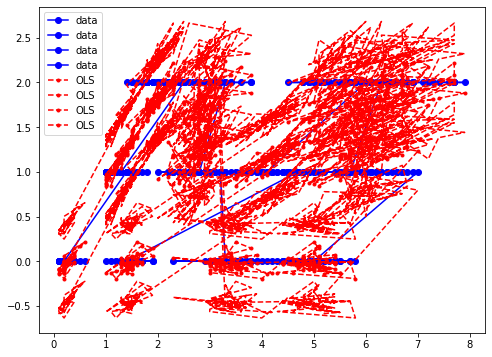

In [16]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print('mean_squared_error' , results.mse_resid )
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X, y, 'b-o', label="data")
# ax.plot(x, y, 'b-', label="True")
ax.plot(X, results.fittedvalues, 'r--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best');

# Run Logistic Regression With A L1 Penalty With Various Regularization Strengths
The usefulness of L1 is that it can push feature coefficients to 0, creating a method for feature selection. In the code below we run a logistic regression with a L1 penalty four times, each time decreasing the value of C. We should expect that as C decreases, more coefficients become 0.


## Standardize Features
Because the regularization penalty is comprised of the sum of the absolute value of the coefficients, we need to scale the data so the coefficients are all based on the same scale.

In [18]:
from sklearn.preprocessing import StandardScaler
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))

C: 10
Coefficient of each feature: [[ 0.11894325  3.75715209 -4.46659507  0.        ]
 [-0.23670367 -2.43158822  1.25831978 -2.67723379]
 [-4.79596004 -3.78041713  8.07142307  7.05712901]]
Training accuracy: 0.5714285714285714
Test accuracy: 0.7631578947368421
C: 1
Coefficient of each feature: [[ 0.          2.34936076 -2.64970296  0.        ]
 [ 0.41880849 -1.48297064  0.42509202 -1.14899754]
 [-3.07932273 -1.46580515  3.76867588  3.21546221]]
Training accuracy: 0.7946428571428571
Test accuracy: 0.7894736842105263
C: 0.1
Coefficient of each feature: [[ 0.          0.93802845 -1.15697725  0.        ]
 [ 0.         -0.26934147  0.00162508  0.        ]
 [-0.79977408  0.          1.07219139  0.        ]]
Training accuracy: 0.7767857142857143
Test accuracy: 0.7368421052631579
C: 0.001
Coefficient of each feature: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Training accuracy: 0.33035714285714285
Test accuracy: 0.34210526315789475


# L2

In [20]:
from sklearn.linear_model import LogisticRegression

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))

C: 10
Coefficient of each feature: [[ 0.64961742  2.10275763 -3.36528383 -1.55600042]
 [ 0.04045115 -2.12726045  1.08131336 -2.4643093 ]
 [-3.44600782 -2.52921959  5.04455429  4.58053786]]
Training accuracy: 0.8303571428571429
Test accuracy: 0.8157894736842105
C: 1
Coefficient of each feature: [[ 0.40385719  1.34115677 -2.13187622 -0.96502847]
 [ 0.36002935 -1.41696832  0.47076324 -1.18255777]
 [-1.66479735 -1.24261811  2.38777713  2.15916026]]
Training accuracy: 0.9196428571428571
Test accuracy: 0.868421052631579
C: 0.1
Coefficient of each feature: [[ 0.19576938  0.68592691 -1.12320524 -0.50952528]
 [-0.01121761 -0.50371762  0.22440751 -0.16500504]
 [-0.54739677 -0.5067795   0.87575689  0.66640326]]
Training accuracy: 0.8482142857142857
Test accuracy: 0.8157894736842105
C: 0.001
Coefficient of each feature: [[-0.04317574  0.0041279  -0.08624475 -0.03529754]
 [-0.04904421 -0.03677981 -0.01678884 -0.00646813]
 [-0.03118903 -0.03431253  0.03060505  0.01948828]]
Training accuracy: 0.8125


# Implementing L1 and L2 regularization using Sklearn

In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 
# Changing the working location to the location of the data 

# Loading the data into a Pandas DataFrame 
data = pd.read_csv('kc_house_data.csv') 

# Dropping the numerically non-sensical variables 
dropColumns = ['id', 'date', 'zipcode'] 
data = data.drop(dropColumns, axis = 1) 

# Separating the dependent and independent variables 
y = data['price'] 
X = data.drop('price', axis = 1) 

# Dividing the data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 


In [22]:
# Bulding and fitting the Linear Regression model 

In [23]:

linearModel = LinearRegression() 
linearModel.fit(X_train, y_train) 

# Evaluating the Linear Regression model 
print(linearModel.score(X_test, y_test)) 


0.6912681108178521


# Ridge(L2) Regression

In [24]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 

# List to maintain the different values of alpha 
alpha = [] 

# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
	ridgeModel = Ridge(alpha = i * 0.25) 
	ridgeModel.fit(X_train, y_train) 
	scores = cross_val_score(ridgeModel, X, y, cv = 10) 
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_ridge.append(avg_cross_val_score) 
	alpha.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
	print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 


0.25 : 69.0894970827475
0.5 : 69.08967368534029
0.75 : 69.08983055347754
1.0 : 69.08996788991834
1.25 : 69.09008589509749
1.5 : 69.09018476715721
1.75 : 69.09026470197706
2.0 : 69.09032589320454


In [25]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 2) 
ridgeModelChosen.fit(X_train, y_train) 

# Evaluating the Ridge Regression model 
print(ridgeModelChosen.score(X_test, y_test)) 

0.6915366748436987


# Lasso(L1) Regression

In [26]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 

# List to maintain the different values of Lambda 
Lambda = [] 

# Loop to compute the cross-validation scores 
for i in range(1, 9): 
	lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
	lassoModel.fit(X_train, y_train) 
	scores = cross_val_score(lassoModel, X, y, cv = 10) 
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_lasso.append(avg_cross_val_score) 
	Lambda.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
	print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 


0.25 : 69.08930606161523
0.5 : 69.08931155961115
0.75 : 69.08931702962538
1.0 : 69.08932247306784
1.25 : 69.08932788218644
1.5 : 69.08933326415631
1.75 : 69.08933863324987
2.0 : 69.08934395591861


In [27]:
# From the above output, we can conclude that the best value of lambda is 2.

# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925) 
lassoModelChosen.fit(X_train, y_train) 
  
# Evaluating the Lasso Regression model 
print(lassoModelChosen.score(X_test, y_test)) 

0.6912769981930384


In [28]:
import warnings
warnings.filterwarnings("ignore")

# ElasticNet

In [29]:
from sklearn.linear_model import ElasticNet


# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 

# List to maintain the different values of Lambda 
Lambda = [] 

# Loop to compute the cross-validation scores 
for i in range(1, 9): 
	ElasticNetModel = ElasticNet(alpha = i * 0.25, tol = 0.0925 ) 
	ElasticNetModel.fit(X_train, y_train) 
	scores = cross_val_score(ElasticNetModel, X, y, cv = 10) 
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_lasso.append(avg_cross_val_score) 
	Lambda.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
	print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 


0.25 : 64.08702924741972
0.5 : 62.95483130892897
0.75 : 62.111088516150915
1.0 : 61.4022541170832
1.25 : 60.79300522056137
1.5 : 60.26436211408361
1.75 : 59.80235842348141
2.0 : 59.3959170619804


In [30]:
# From the above output, we can conclude that the best value of lambda is 2.

# Building and fitting the Lasso Regression Model 
ElasticNetModelChosen = ElasticNet(alpha = 0.2, tol = 0.0925) 
ElasticNetModelChosen.fit(X_train, y_train) 
  
# Evaluating the Lasso Regression model 
print(ElasticNetModelChosen.score(X_test, y_test)) 

0.6602050273909618


In [31]:
# Building the two lists for visualization 
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression' , 'ElasticNet Regression'] 
scores = [linearModel.score(X_test, y_test), 
		ridgeModelChosen.score(X_test, y_test), 
		lassoModelChosen.score(X_test, y_test) , 
        ElasticNetModelChosen.score(X_test, y_test)] 

# Building the dictionary to compare the scores 
mapping = {} 
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test) 
mapping['Ridge Regreesion'] = ridgeModelChosen.score(X_test, y_test) 
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test) 
mapping['ElasticNet Regression'] = ElasticNetModelChosen.score(X_test, y_test) 

# Printing the scores for different models 
for key, val in mapping.items(): 
	print(str(key)+' : '+str(val)) 


Linear Regreesion : 0.6912681108178521
Ridge Regreesion : 0.6915366748436987
Lasso Regression : 0.6912769981930384
ElasticNet Regression : 0.6602050273909618


In [ ]:
max(scores)

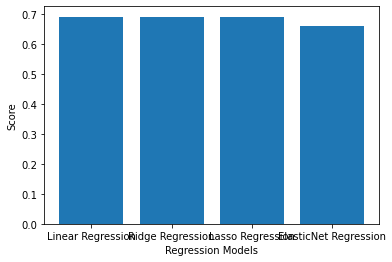

In [32]:
# Plotting the scores 
plt.bar(models, scores) 
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.show() 


# ZCA

In [33]:
import numpy as np
def zca_whitening_matrix(X):
    """
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    INPUT:  X: [M x N] matrix.
        Rows: VariablesQ
        Columns: Observations
    OUTPUT: ZCAMatrix: [M x M] matrix
    """
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(X, rowvar=True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # Whitening constant: prevents division by zero
    epsilon = 1e-5
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]
    return ZCAMatrix

X = np.array([[0, 2, 2], [1, 1, 0], [2, 0, 1], [1, 3, 5], [10, 10, 10] ]) # Input: X [5 x 3] matrix
ZCAMatrix = zca_whitening_matrix(X) # get ZCAMatrix
ZCAMatrix # [5 x 5] matrix

mse_model

NameError: name 'mse_model' is not defined